# 이거 모지?

In [ ]:
# 딥러닝 관련 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# MNIST 데이터셋 불러오기
mnist = keras.datasets.mnist

In [ ]:
# 학습용, 테스트용으로 나누기
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [ ]:
# 학습용 데이터 형태 살펴보기
x_train.shape

(60000, 28, 28)

In [ ]:
# 학습용 첫 번째 데이터 살펴보기1
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# 학습용 첫 번째 데이터 살펴보기2
for x in x_train[0]:
  for i in x:
    print('{:3} '.format(i), end='')
  print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [ ]:
y_train[0]

5

In [ ]:
# 데이터 전처리(0~1 사이 숫자로)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [ ]:
# 모델 만들기 : 입력층(784) - 은닉층1(256) - 은닉층2(128) - 은닉층3(64) - 출력층(10)
model = keras.models.Sequential([
    # 입력층
    keras.layers.Flatten(input_shape = (28,28)),
    # 은닉층
    keras.layers.Dense(256, activation = 'relu'),
    # 은닉층2
    keras.layers.Dense(128, activation = 'relu'),
    # 은닉층3
    keras.layers.Dense(64, activation = 'relu'),
    # 출력층
    keras.layers.Dense(10, activation = 'softmax'),  # 확률을 출력해준다
])

In [ ]:
# 모델 컴파일 : 최적화 함수, 손실 함수 설정 + 평가 지표 설정 + 가중치 초기화
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 학습 : 전체 데이터는 5번 반복
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6755 - accuracy: 0.7806
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3094 - accuracy: 0.9074
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2311 - accuracy: 0.9308
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1803 - accuracy: 0.9459
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1475 - accuracy: 0.9553


In [ ]:
# 모델 평가   ->   위에는 봤던 데이터를 계속 돌리니 잘 맞출 수 있다 -> 완전 새로운 데이터를 줘보자
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1399 - accuracy: 0.9566


[0.13985000550746918, 0.95660001039505]

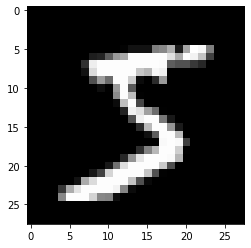

In [ ]:
# 예측 - 0번째 숫자 이미지로 보기
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [ ]:
# 예측 - 0번째 숫자 예측하기1
print(model.predict(x_train[0].reshape(1,28,28)))

[[8.9155571e-07 3.5800873e-05 8.7012047e-08 4.4687059e-02 1.1400163e-11
  9.5526099e-01 6.7583233e-10 4.4133717e-06 9.3668032e-06 1.4581179e-06]]


In [ ]:
# 예측 - 0번째 숫자 예측하기2
print(np.argmax(model.predict(x_train[0].reshape(1,28,28))))

5


# 이수안 컴퓨터 딥러닝 한번에 끝내기

## 텐서(Tensor)
- Rank: 축의 개수
- Shape: 형상(각 축에 따른 차원 개수)
- Type: 데이터 타입

In [ ]:
import numpy as np
import tensorflow as tf

### 0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 텐서(tensor)
- 축과 형상이 없음

In [ ]:
t0 = tf.constant(1)
print(t0)
print(tf.rank(t0))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


### 1D Tensor(Vector)
- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재

In [ ]:
t1 = tf.constant([1,2,3])
print(t1)
print(tf.rank(t1))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


### 2D Tensor(Matrix)
- 행렬과 같은 모양으로 두개의 축이 존재
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

In [ ]:
t2 = tf.constant([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
print(t2)
print(tf.rank(t2))

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


### 3D Tensor
- 큐브(cube)와 같은 모양으로 세개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
- 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

In [ ]:
t3 = tf.constant([[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]])
print(t3)
print(tf.rank(t3))

tf.Tensor(
[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]], shape=(3, 3, 3), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


### 4D Tensor
- 4개의 축
- 컬러 이미지 데이터가 대표적인 사례(흑백 이미지 데이터는 3D Tensor로 가능)
- 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

### 5D Tensor
- 5개의 축
- 비디오 데이터가 대표적인 사례
- 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

### 텐서 데이터 타입
- 텐서의 기본 dtype
  - 정수형 텐서: int32
  - 실수형 텐서: float32
  - 문자열 텐서: string
- int32, float32, string 타입 외에도 float16, int8 타입 등이 존재
- 연산시 텐서의 타입 일치 필요
- 타입변환에는 tf.cast()사용

In [ ]:
i = tf.constant(2)
print(i)

tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
f = tf.constant(2.)
print(f)

tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
s = tf.constant('Jun')
print(s)

tf.Tensor(b'Jun', shape=(), dtype=string)


In [ ]:
f16 = tf.constant(2., dtype=tf.float16)
print(f16)

tf.Tensor(2.0, shape=(), dtype=float16)


In [ ]:
i8 = tf.constant(2, dtype=tf.int8)
print(i8)

tf.Tensor(2, shape=(), dtype=int8)


In [ ]:
f32 = tf.cast(f16, tf.float32) # 타입이 float16이였던 애를 float32로 변경
print(f32)

tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
i32 = tf.cast(i8, tf.int32) #타입이 int8이였던 애를 int32로 변경
print(i32)

tf.Tensor(2, shape=(), dtype=int32)


### 텐서 연산

In [ ]:
print(tf.constant(2) + tf.constant(2))
print(tf.constant(2) - tf.constant(2))
print(tf.add(tf.constant(2), tf.constant(2)))
print(tf.subtract(tf.constant(2), tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
print(tf.constant(2) * tf.constant(2))
print(tf.constant(2) / tf.constant(2))
print(tf.multiply(tf.constant(2), tf.constant(2)))
print(tf.divide(tf.constant(2), tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float64)


In [ ]:
# print(tf.constant(2) + tf.constant(2.2))  이 코드는 서로 타입이 맞지 않아서 실행하면 오류 발생
print(tf.cast(tf.constant(2), tf.float32)+ tf.constant(2.2))  # 이렇게 cast 후 연산 가능

tf.Tensor(4.2, shape=(), dtype=float32)


## 딥러닝 구조 및 학습
- 딥러닝 구조와 학습에 필요한 요소
  - 모델(네트워크)를 구성하는 레이어(layer)
  - 입력 데이터와 그에 대한 목적(결과)
  - 학습시에 사용할 피드백을 정의하는 손실 함수(loss function)
  - 학습 진행 방식을 결정하는 옵티마이저(optimizer)

### 레이어(layer)
- 신경망의 핵심 데이터 구조
- 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
- 상태가 없는 레이어도 있지만, 대부분 가중치(weight)라는 레이어 상태를 가짐
- 가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서

- keras에서 사용되는 주요 레이어
  - Dense
  - Activation
  - Flatten
  - Input

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Input

### Dense
- 완전연결계층(Fully-Connected Layer)
- 노드수(유닛수), 활성화 함수(activation)등을 지정
- name을 통한 레이어간 구분 가능
- 가중치 초기화(kernel_initializer)             kernel_initializer : 처음에 이 레이어에 존재하는 노드들의 가중치값을 몇으로할지 지정을 미리 할 수 있다.
  - 신경망의 성능에 큰 영향을 주는 요소
  - 보통 가중치의 초기값으로 0에 가까운 무작위 값 사용
  - 특정 구조의 신경망을 동일한 학습 데이터로 학습시키더라도, 가중치의 초기값에 따라 학습된 신경망의 성능 차이가 날 수 있음
  - 오차역전파 알고리즘은 기본적으로 경사하강법을 사용하기 때문에 최적해가 아닌 지역해에 빠질 가능성이 있음
  - Keras에서는 기본적으로 Glorot uniform 가중치(Xavier 분포 초기화), zeros bias로 초기화
  - kernel_initializer 인자를 통해 다른 가중치 초기화 지정 가능
  - Keras에서 제공하는 가중치 초기화 종류: https://Keras.io/api/layers/initializers/

In [ ]:
Dense(10, activation='softmax') # 유닛 10

In [ ]:
Dense(10, activation='relu', name='Dense Layer') # 유닛 10 / 이름도 지정가능

In [ ]:
Dense(10, kernel_initializer='he_normal', name='Dense Layer')

### Activation
- Dense layer에서 미리 활성화 함수를 지정할 수도 있지만 필요에 따라 별도 레이어를 만들어줄 수 있음
- Keras에서 제공하는 활성화 함수(activation function) 종류 : https://keras.io/ko/activations/ 
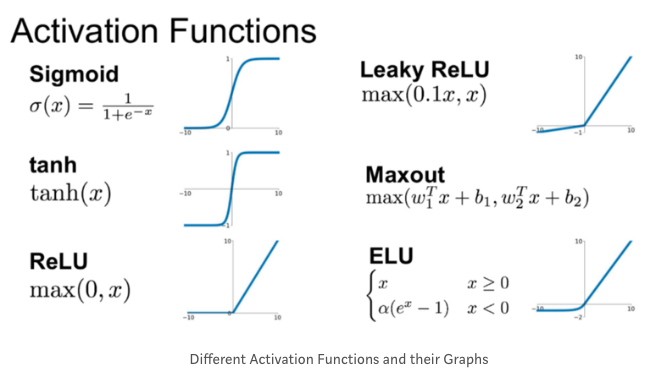

In [ ]:
dense = Dense(10, activation='relu', name='Dense Layer')
Activation(dense)

### Flatten
- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업
- 예시)
  - (128, 3, 2, 2) -> (128, 12)

In [ ]:
Flatten(input_shape=(128, 3, 2, 2))

### Input
- 모델의 입력을 정의
- shape, dtype을 포함
- 하나의 모델은 여러 개의 입력을 가질 수 있음
- summary() 메소드를 통해서는 보이지 않음

In [ ]:
Input(shape=(28, 28), dtype=tf.float32)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_1')>

In [ ]:
Input(shape=(8,), dtype=tf.int32)

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_2')>

## 모델(Model)
- 딥러닝 모델은 레이어로 만들어진 비순환 유향(방향이 있는) 그래프(Directed Acyclic Grap)

### 모델 구성
- Sequential()
- 서브클래싱(Subclassing)
- 함수형 API

### Sequential()
- 모델이 순차적인 구조로 진행할 때 사용
- 간단한 방법
  - Sequential 객체 생성 후, add()를 이용한 방법
  - Sequential 인자에 한번에 추가 방법
- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음

In [ ]:
 from tensorflow.keras.layers import Dense, Input, Flatten
 from tensorflow.keras.models import Sequential, Model
 from tensorflow.keras.utils import plot_model  # 모델을 이미지로 출력해줌

In [ ]:
# 방법1
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(300, activation='relu'))  # 300짜리 유닛(일꾼)지정
model.add(Dense(100, activation='relu'))  # 100짜리 유닛(일꾼)지정
model.add(Dense(10, activation='softmax'))  # 10짜리 유닛(일꾼)지정
model.summary()  # Input은 summary에서 보이지않음

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 28, 300)           8700      
                                                                 
 dense_2 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_3 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


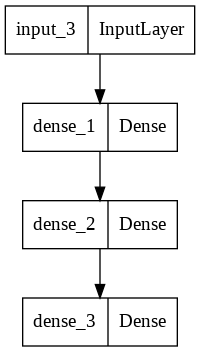

In [ ]:
# 텍스트로 뜨는거보다 눈으로 (그림처럼) 확인하고 싶다면
plot_model(model)

In [ ]:
# 위에는 add를 사용해서 만들었는데 리스트로 만드는 방법도 있다.
# 방법2
model = Sequential([Input(shape=(28,28), name='Input'),
                    Dense(300, activation='relu', name='Dense1'),
                    Dense(100, activation='relu', name='Dense2'),
                    Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 100)           30100     
                                                                 
 Output (Dense)              (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


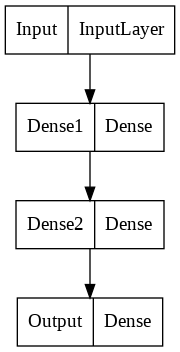

In [ ]:
plot_model(model)

### 함수형 API
- 가장 권장되는 방법
- 모델을 복잡하고, 유연하게 구성 가능
- 다중 입출력을 다룰 수 있음

In [ ]:
inputs = Input(shape=(28, 28, 1))
x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


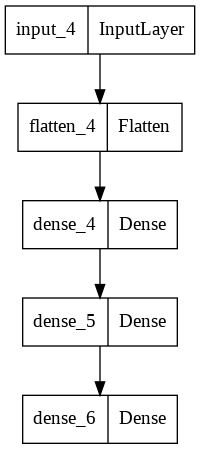

In [ ]:
plot_model(model)

In [ ]:
from tensorflow.keras.layers import Concatenate

input_layer = Input(shape=(28,28))
hidden1 = Dense(100, activation='relu')(input_layer)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_layer], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 28, 100)      2900        ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 28, 30)       3030        ['dense_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 28, 58)       0           ['input_1[0][0]',                
                                                                  'dense_3[0][0]']            

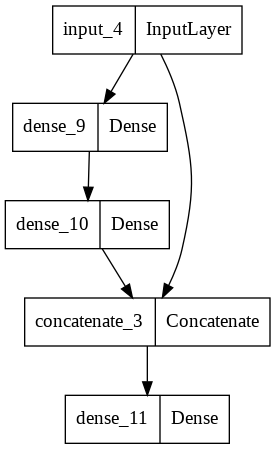

In [ ]:
plot_model(model)

In [ ]:
# 입력이 여러개
input_1 = Input(shape=(10,10), name='Input_1')
input_2 = Input(shape=(10,28), name='Input_2')
hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='output')(concat)
model = Model(inputs=[input_1,input_2], outputs=output)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_18 (Dense)               (None, 10, 100)      2900        ['Input_2[0][0]']                
                                                                                                  
 Input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_19 (Dense)               (None, 10, 10)       1010        ['dense_18[0][0]']               
                                                                                            

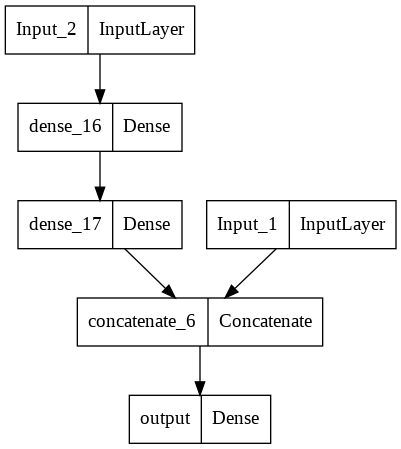

In [ ]:
plot_model(model)

In [ ]:
# 출력이 여러개
input_ = Input(shape=(10,10), name='input_')
hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=input_, outputs=[output, sub_out])
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_39 (Dense)               (None, 10, 100)      1100        ['input_[0][0]']                 
                                                                                                  
 dense_40 (Dense)               (None, 10, 10)       1010        ['dense_39[0][0]']               
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_40[0][0]']               
                                                                                           

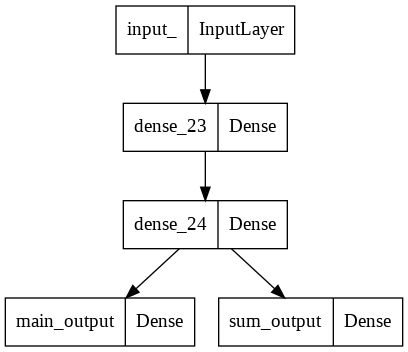

In [ ]:
plot_model(model)

In [ ]:
# input_1 = Input(shape=(10,10), name='input_1')
# input_2 = Input(shape=(10,28), name='input_2')
# hidden1 = Dense(100, activation='relu')(input_2)
# hidden2 = Dense(10, activation='relu')(hidden1)
# concat = Concatenate()([input_1, hidden2])
# ouput = Dense(1, activation='sigmoid', name='main_output')(concat)
# sub_out = Dense(1, name='sum_output')(hidden2)

# model = Model(inputs=[input_1, input_2], outputs=[output,sub_out])
# model.summary()

### 서브클래싱(Subclassing)
- 커스터마이징에 최적화된 방법
- Model클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음
  - fit(), evaluate(), predict()
  - save(), load()
- 주로 call() 메소드안에서 원하는 계산 가능
  - for, if, 저수준 연산 등
- 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때, 해석할 수 있어야함

In [ ]:
class MyModel(Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = Dense(300, activation=activation)
    self.dense_layer2 = Dense(100, activation=activation)
    self.dense_layer3 = Dense(units, activation=activation)
    self.output_layer = Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x

#### 모델 가중치 확인

In [ ]:
inputs = Input(shape=(28,28,1))
x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 300)               235500    
                                                                 
 dense_17 (Dense)            (None, 100)               30100     
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden_2 = model.layers[2]
hidden_2.name

'dense_16'

In [ ]:
model.get_layer('dense_16') is hidden_2

True

In [ ]:
weights, biases = hidden_2.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [ ]:
print(weights)

[[-0.0043821  -0.06294492 -0.06147023 ...  0.05790094  0.0011992
   0.0548383 ]
 [ 0.06768879  0.05438526 -0.03822653 ... -0.05100727 -0.06505986
  -0.05650149]
 [-0.00490788  0.02896139 -0.05343065 ...  0.03446032  0.0546834
  -0.01004639]
 ...
 [ 0.07212986 -0.01900487  0.00766414 ... -0.06811978 -0.01688949
  -0.02216797]
 [ 0.05047347 -0.07073436  0.03873287 ...  0.05952176 -0.05646329
   0.03581977]
 [-0.00157051 -0.05834523  0.05343731 ...  0.00747115 -0.01380622
  -0.05271658]]


In [ ]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 모델 컴파일(compile)
- 모델을 구성한 후, 사용할 손실 함수(loss function), 옵티마이저(optimizer)를 지정

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### 손실 함수(Loss Function)
- 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
- 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
- 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
- 최적화 이론에서 최소화 하고자 하는 함수
- 미분 가능한 함수 사용
- Keras에서 주요 손실 함수 제공
  - sparse_categorical_crossentropy: 클래스가 베타적 방식으로 구분, 즉(0,1,2,...,9)와 같은 방식으로 구분되어 있을 때 사용
  - categorical_cross_entropy: 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용
  - binary_crossentropy: 이진 분류를 수행할 때 사용

### 모델 학습, 평가 및 예측
- fit()
  - x : 학습 데이터
  - y : 학습 데이터 정답 레이블
  - epochs : 학습 회수
  - batch_size : 단일 배치에 있는 학습 데이터의 크기
  - validation_data : 검증을 위한 데이터
- evaluate()
  - 테스트 데이터를 이용한 평가
- predict()
  -임의의 데이터를 사용해 예측

### MNIST 딥러닝 모델 예제
- 손으로 쓴 숫자들로 이루어진 이미지 데이터셋
- 기계 학습 분야의 트레이닝 및 테스트에 널이 사용되는 데이터
- keras.datasets에 기본으로 포함되어 있는 데이터셋

#### 모듈 임포트

In [ ]:
1시간 36분

#### 데이터 로드 및 전처리
- MNIST 데이터셋을 로드
- Train Data 중, 30%를 검증 데이터(validation data)로 사용

# 이수안 컴퓨터

In [ ]:
s = 'No pain no gain'

In [ ]:
'pain' in s

True

In [ ]:
s.split().index('gain')

3

In [ ]:
s.split()[2][::-1]

'on'

In [ ]:
s = 'AbCdEfGh'
str_lower = s.lower()
str_upper = s.upper()
print(str_lower, str_upper)

abcdefgh ABCDEFGH


In [ ]:
s = 'I visited UK from US on 22-09-20'
s

'I visited UK from US on 22-09-20'

In [ ]:
new_s = s.replace('UK','United Kingdom').replace('US','United States').replace('-20','-2020')
new_s

'I visited United Kingdom from United States on 22-09-2020'

## 정규표현식

###### 정규 표현식은 특정 문자들을 편리하게 지정하고 추가, 삭제 가능
###### 데이터 전처리에서 정규 표현식을 많이 사용
###### 파이썬에서는 정규표현식을 지원하는 re패키지 제공


In [ ]:
import re
check = 'ab.'
print(re.match(check, 'abc'))
print(re.match(check, 'c'))
print(re.match(check, 'ab'))

<re.Match object; span=(0, 3), match='abc'>
None
None


###### compile을 통해 정규 표현식을 사용할 경우 re가 아닌 컴파일한 객체 이름을 통해 사용해야함

In [ ]:
import time

normal_s_time = time.time()
r = 'ab.'
for i in range(1000):
  re.match(check, 'abc')
print('일반 사용시 소요 시간: ', time.time() - normal_s_time)

compile_s_time = time.time()
r = re.compile('ab.')
for i in range(1000):
  r.match(check)
print("컴파일 사용시 소요 시간: ", time.time() - compile_s_time)

일반 사용시 소요 시간:  0.000989675521850586
컴파일 사용시 소요 시간:  0.0006847381591796875


###### search
###### match와 다르게, search는 문자열의 전체를 검사

In [ ]:
check = 'ab?'

print(re.search('a',check))
print(re.match('kkkab', check))
print(re.search('kkkab', check))
print(re.match('ab',check))

<re.Match object; span=(0, 1), match='a'>
None
None
<re.Match object; span=(0, 2), match='ab'>


###### findall
###### 컴파일한 정규 표현식을 이용해 정규 표현식과 맞는 모든 문자(열)을 리스트로 반환

In [ ]:
print(re.findall('[\d]', '1ab 2cd 3ef 4g'))
print(re.findall('[\W]', '!abcd@@#'))

## 토큰화
### 단어토큰화
###### 토큰화는 nltk 패키지의 tokenize 모듈을 사용해 손쉽게 구현 가능
###### 단어 토큰화는 word_tokenize()함수를 사용해 구현가능

In [ ]:
sentence = 'Time is gold'
from nltk.tokenize import word_tokenize
tokens = word_tokenize(sentence)
tokens

['Time', 'is', 'gold']

### 문장 토큰화

In [ ]:
from nltk.tokenize import sent_tokenize
sentences = 'The world is a beautiful book. \nBut of little use to him who cannot read it'
tokens = sent_tokenize(sentences)
tokens

['The world is a beautiful book.',
 'But of little use to him who cannot read it']

###### 정규 표현식을 이용한 토큰화

In [ ]:
from nltk.tokenize import RegexpTokenizer
sentence = 'Where there\'s a will, there\'s a way'
tokenizer = RegexpTokenizer("[\w]+")
token = tokenizer.tokenize(sentence)
token

['Where', 'there', 's', 'a', 'will', 'there', 's', 'a', 'way']

In [ ]:
tokenizer = RegexpTokenizer("[\s]+", gaps=True)
tokens = tokenizer.tokenize(sentence)
tokens

['Where', "there's", 'a', 'will,', "there's", 'a', 'way']

###### 케라스를 이용한 토큰화

In [ ]:
from keras.preprocessing.text import text_to_word_sequence
sentence = 'Where there\'s a will, there\'s a way'
text_to_word_sequence(sentence)

['where', "there's", 'a', 'will', "there's", 'a', 'way']

###### TextBlob을 이용한 토큰화

In [ ]:
from textblob import TextBlob
sentence = 'Where there\'s a will, there\'s a way'
blob = TextBlob(sentence)
blob.words

WordList(['Where', 'there', "'s", 'a', 'will', 'there', "'s", 'a', 'way'])

# 동빈나 - 데이터 분석과 이미지 처리

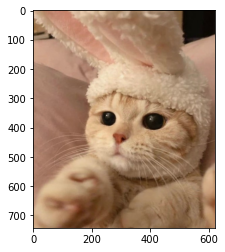

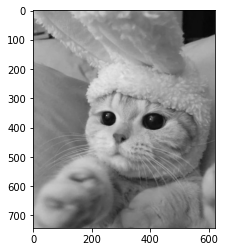

In [ ]:
import cv2
import matplotlib.pyplot as plt

# OpenCV : [B, G, R]    /    Matplotlib : [R, G, B]
img_basic = cv2.imread('cat.png', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))   # opencv로 불러와서 BGR이니 BGR을 RGB로 변경
plt.show()

img_basic = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)  # 회색화면이 보고싶다면 BGR을 GRAY로 변경 후 
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_GRAY2RGB))  # 다시 GRAY를 RGB로 변경해야함.
plt.show()

### 8번
OpenCV를 활용한 이미지 크기 및 픽셀 정보 확인 

In [ ]:
import cv2
image = cv2.imread('cat.png')

# 픽셀 수 및 이미지 크기 확인
print("shape :",image.shape)
print("size :",image.size)

# 이미지 Numpy 객체의 특정 픽셀을 가리킨다.
px = image[100,100]

# B, G, R 순서로 출력된다. (단 Gray Scale인 경우에는 B, G, R로 구분되지 않는다)
print("px :",px)

# R값만 출력하기
print("R :",px[2])

shape : (743, 620, 3)
size : 1381980
px : [117 146 177]
R : 177


특정 범위 픽셀 변경

In [ ]:
https://youtu.be/KkQC3q3mTgo?list=PLRx0vPvlEmdBx9X5xSgcEk4CEbzEiws8C&t=249